# Deep Learning Exercise #1 _ Hadas Halperin: 315679225 & Chernet Maru: 327441440


### Installing packages, list installed packages, upgrade package.

### importing libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import keras
from keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import keras
from keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow import keras
from tensorflow.keras import layers


### Extracting Files From Folders and Number Length Validation

### Section number A

In [16]:
Read_folder = r'C:\Users\USER\Desktop\Machine Learning\chest_xray'


BATCH_SIZE=16
num_classes = 2 # Number of class for the dataset

# Normalization

Train_Normalize = ImageDataGenerator(rescale=1./255)
Test_Normalize = ImageDataGenerator(rescale=1./255)
Val_Normalize = ImageDataGenerator(rescale=1./255)

# Redefine names
train_directory = os.path.join(Read_folder, 'train')
val_directory = os.path.join(Read_folder, 'val')
test_directory = os.path.join(Read_folder, 'test')


# Deviding the training folder to train & validation
train_data = tf.keras.utils.image_dataset_from_directory(
    train_directory, seed=3, validation_split=0.20, subset='training')
    
val_data = tf.keras.utils.image_dataset_from_directory(
  
    train_directory, seed=3, validation_split=0.20, subset='validation')

#print('Test size is',len(Test_Data))
# resizing and dividing to batches
Train_Data=Train_Normalize.flow_from_directory(train_directory, target_size=(224,224),class_mode='binary', batch_size= BATCH_SIZE, color_mode='grayscale')
Test_Data=Test_Normalize.flow_from_directory(test_directory, target_size=(224,224),class_mode='binary',batch_size= BATCH_SIZE, color_mode='grayscale')
Val_Data=Val_Normalize.flow_from_directory(val_directory, target_size=(224,224),class_mode='binary', batch_size= 2, color_mode='grayscale')

#Train_Data=Train_Normalize.flow_from_directory(train_directory, target_size=(224,224),batch_size= BATCH_SIZE,class_mode='categorical')
#Test_Data=Test_Normalize.flow_from_directory(test_directory, target_size=(224,224),batch_size= BATCH_SIZE,class_mode='categorical')
#Val_Data=Val_Normalize.flow_from_directory(val_directory, target_size=(224,224),batch_size= BATCH_SIZE,class_mode='categorical')


# Validate the shape and batch size
print('Test size is',len(Test_Data))
print('Image shape is: ',Test_Data.image_shape)
print('Train batch size is',len(Train_Data))
print('Test batch size is',len(Test_Data))
print("Classes list: ",Train_Data.class_indices)
print("Number of classes model is : ",Train_Data.num_classes)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.
Found 5216 files belonging to 2 classes.
Using 1043 files for validation.
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Test size is 39
Image shape is:  (224, 224, 1)
Train batch size is 326
Test batch size is 39
Classes list:  {'NORMAL': 0, 'PNEUMONIA': 1}
Number of classes model is :  2


In [7]:
directory = Read_folder

[image_name for image_name in os.walk(directory)]

for folder_name in os.listdir(directory):
  print(folder_name)
  for sub_folder_name in os.listdir(os.path.join(directory,folder_name)):
    print(sub_folder_name)
    for image_name in os.listdir(os.path.join(directory,folder_name,sub_folder_name)):
      print(image_name)

test
NORMAL
IM-0001-0001.jpeg
IM-0003-0001.jpeg
IM-0005-0001.jpeg
IM-0006-0001.jpeg
IM-0007-0001.jpeg
IM-0009-0001.jpeg
IM-0010-0001.jpeg
IM-0011-0001-0001.jpeg
IM-0011-0001-0002.jpeg
IM-0011-0001.jpeg
IM-0013-0001.jpeg
IM-0015-0001.jpeg
IM-0016-0001.jpeg
IM-0017-0001.jpeg
IM-0019-0001.jpeg
IM-0021-0001.jpeg
IM-0022-0001.jpeg
IM-0023-0001.jpeg
IM-0025-0001.jpeg
IM-0027-0001.jpeg
IM-0028-0001.jpeg
IM-0029-0001.jpeg
IM-0030-0001.jpeg
IM-0031-0001.jpeg
IM-0033-0001-0001.jpeg
IM-0033-0001-0002.jpeg
IM-0033-0001.jpeg
IM-0035-0001.jpeg
IM-0036-0001.jpeg
IM-0037-0001.jpeg
IM-0039-0001.jpeg
IM-0041-0001.jpeg
IM-0043-0001.jpeg
IM-0045-0001.jpeg
IM-0046-0001.jpeg
IM-0049-0001.jpeg
IM-0050-0001.jpeg
IM-0059-0001.jpeg
IM-0061-0001.jpeg
IM-0063-0001.jpeg
IM-0065-0001.jpeg
IM-0067-0001.jpeg
IM-0069-0001.jpeg
IM-0070-0001.jpeg
IM-0071-0001.jpeg
IM-0073-0001.jpeg
IM-0075-0001.jpeg
IM-0077-0001.jpeg
IM-0079-0001.jpeg
IM-0081-0001.jpeg
IM-0083-0001.jpeg
IM-0084-0001.jpeg
IM-0085-0001.jpeg
IM-0086-0001.j

### Model Configuration

In [17]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Flatten(input_shape=(224,224,1)))
#model.add(layers.Dense(64, activation='relu', name='Dense1'))
#model.add(layers.Dense(64, activation='relu', name='Dense2'))
model.add(layers.Dense(32, activation='relu', name='Dense1'))
model.add(layers.Dense(32, activation='relu', name='Dense2'))
model.add(layers.Dense(1, activation='sigmoid', name='Dense3'))
model.summary()

Model: "my_sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 Dense1 (Dense)              (None, 32)                1605664   
                                                                 
 Dense2 (Dense)              (None, 32)                1056      
                                                                 
 Dense3 (Dense)              (None, 1)                 33        
                                                                 
Total params: 1,606,753
Trainable params: 1,606,753
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Let's train the model using adam
opt = keras.optimizers.Adam(learning_rate=1e-6)
model.compile(loss='binary_crossentropy', optimizer = opt, metrics=['accuracy'])
#opt = keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)
#model.compile(loss='categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

### Section number B

In [19]:
epochs =70
model_fit = model.fit(Train_Data,validation_data = Val_Data, epochs=epochs, batch_size=BATCH_SIZE )


Epoch 1/70
326/326 [==============================] - 31s 94ms/step - loss: 0.5201 - accuracy: 0.7429 - val_loss: 0.7307 - val_accuracy: 0.5000
Epoch 2/70
326/326 [==============================] - 31s 94ms/step - loss: 0.4338 - accuracy: 0.7743 - val_loss: 0.6576 - val_accuracy: 0.5625 loss: 0.44
Epoch 3/70
326/326 [==============================] - 31s 95ms/step - loss: 0.3808 - accuracy: 0.8317 - val_loss: 0.6305 - val_accuracy: 0.6875
Epoch 4/70
326/326 [==============================] - 31s 94ms/step - loss: 0.3436 - accuracy: 0.8687 - val_loss: 0.6437 - val_accuracy: 0.6875A: 2 - ETA: 22 - ETA: 18s - loss: 0 - ETA: 16s - loss: 0.3605 - accuracy - ETA:  - ETA: 0s - loss: 0.3448 - accu
Epoch 5/70
326/326 [==============================] - 31s 95ms/step - loss: 0.3173 - accuracy: 0.8834 - val_loss: 0.5940 - val_accuracy: 0.6875
Epoch 6/70
326/326 [==============================] - 31s 95ms/step - loss: 0.2951 - accuracy: 0.9009 - val_loss: 0.5806 - val_accuracy: 0.6875
Epoch 7/70
32

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


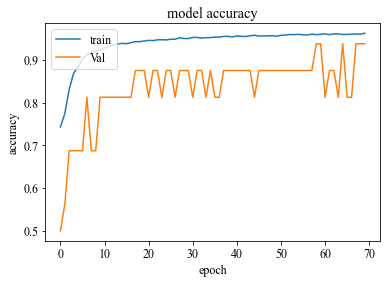

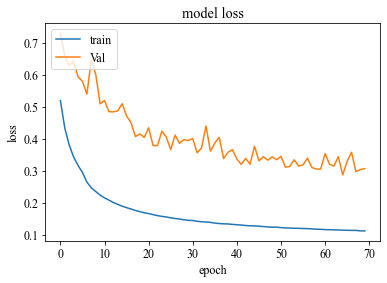

In [24]:
print(model_fit.history.keys())
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

### Section number C

In [25]:
Predictions_First_Model = model.predict(Test_Data) 
y_Prediction_First = Predictions_First_Model > 0.5
y_True_First = Test_Data.classes 

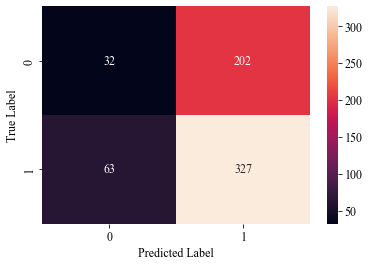

In [26]:
import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_True_First, y_Prediction_First)
sns.heatmap(mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [27]:
#Recall = TP / (TP + FN)
#precision = TP /(TP + FP)
mat = confusion_matrix(y_True_First, y_Prediction_First)

tp, fn, fp, tn = mat.ravel()

precision = tp / ( tp + fp )
recall =  tp / ( tp + fn )

print('precision -', precision)
print('recall -', recall)

precision - 0.3368421052631579
recall - 0.13675213675213677


### Section number D

#### Defining a convolution model  - (model 2)

In [15]:
tf.keras.backend.clear_session()

In [33]:
SecondMod = keras.Sequential(
    [
        keras.Input(shape=(224,224,1)),
        #layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), #output is 32 the amount of filters
        #layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid"), #sigmoid is ideal for classification problems,
    ]
)

SecondMod.summary()

epochs = 70

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [34]:
# we use binary labels thus we need loss with binarycrosstropy
    
SecondMod.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=1e-6), metrics=['accuracy'])


In [35]:
SecondMod_Fit = SecondMod.fit(Train_Data,validation_data = Val_Data, epochs = epochs ,batch_size = BATCH_SIZE)

Epoch 1/70
326/326 [==============================] - 140s 427ms/step - loss: 0.6997 - accuracy: 0.4641 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/70
326/326 [==============================] - 140s 430ms/step - loss: 0.6466 - accuracy: 0.7362 - val_loss: 0.7099 - val_accuracy: 0.5000
Epoch 3/70
326/326 [==============================] - 142s 436ms/step - loss: 0.6085 - accuracy: 0.7429 - val_loss: 0.7427 - val_accuracy: 0.5000
Epoch 4/70
326/326 [==============================] - 144s 441ms/step - loss: 0.5889 - accuracy: 0.7429 - val_loss: 0.7762 - val_accuracy: 0.5000
Epoch 5/70
326/326 [==============================] - 143s 437ms/step - loss: 0.5810 - accuracy: 0.7429 - val_loss: 0.7977 - val_accuracy: 0.5000
Epoch 6/70
326/326 [==============================] - 145s 443ms/step - loss: 0.5789 - accuracy: 0.7429 - val_loss: 0.8092 - val_accuracy: 0.5000
Epoch 7/70
326/326 [==============================] - 144s 440ms/step - loss: 0.5771 - accuracy: 0.7429 - val_loss: 0.8132 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


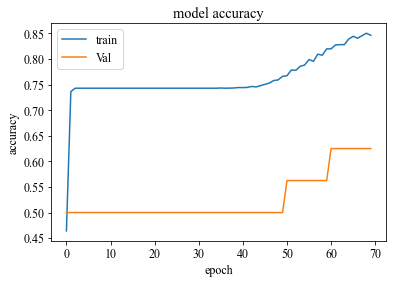

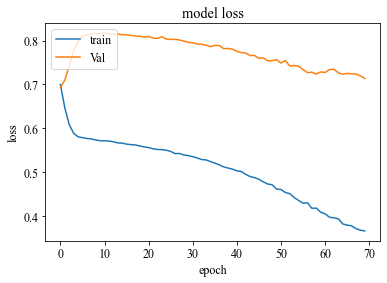

In [36]:
print(SecondMod_Fit.history.keys())
plt.plot(SecondMod_Fit.history['accuracy'])
plt.plot(SecondMod_Fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(SecondMod_Fit.history['loss'])
plt.plot(SecondMod_Fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

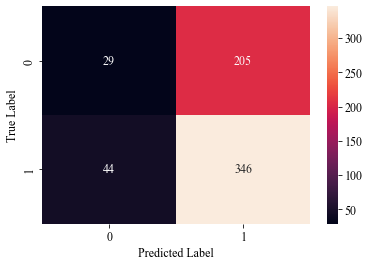

In [37]:
SecondMod_Prediction = SecondMod.predict(Test_Data) 
y_Prediction_Second = SecondMod_Prediction > 0.5
y_True_Second = Test_Data.classes 

import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_True_Second, y_Prediction_Second)
sns.heatmap(mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [38]:
import sklearn.metrics

recall = sklearn.metrics.recall_score(y_True_Second, y_Prediction_Second, pos_label=1)
print(" The recall of model is:" ,recall)

precision = sklearn.metrics.precision_score(y_True_Second, y_Prediction_Second, pos_label=1)
print("The precision of the model is:" ,precision)

 The recall of model is: 0.8871794871794871
The precision of the model is: 0.6279491833030852


## Section E - changing the learning rate of Second Model from 1e-6 ==> 1e-4

In [1]:
tf.keras.backend.clear_session()
input_shape = (224, 224, 1)
epochs = 70
num_classes = 2


Third_Model_CNN = Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), #output is 32 the amount of filters
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid"), #sigmoid is ideal for classification problems,
    ])

NameError: name 'tf' is not defined

In [40]:
Third_Model_CNN.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=1e-4), metrics=['accuracy'])

Third_Model_CNN_Fit = Third_Model_CNN.fit(Train_Data,validation_data = Val_Data, epochs = epochs ,batch_size = BATCH_SIZE)


Epoch 1/70
326/326 [==============================] - 141s 431ms/step - loss: 0.4563 - accuracy: 0.7975 - val_loss: 0.8914 - val_accuracy: 0.6250
Epoch 2/70
326/326 [==============================] - 141s 433ms/step - loss: 0.1772 - accuracy: 0.9327 - val_loss: 0.5872 - val_accuracy: 0.6875
Epoch 3/70
326/326 [==============================] - 142s 434ms/step - loss: 0.1295 - accuracy: 0.9509 - val_loss: 0.2817 - val_accuracy: 0.8750
Epoch 4/70
326/326 [==============================] - 143s 438ms/step - loss: 0.1140 - accuracy: 0.9555 - val_loss: 0.4253 - val_accuracy: 0.8125
Epoch 5/70
326/326 [==============================] - 141s 434ms/step - loss: 0.1040 - accuracy: 0.9599 - val_loss: 0.6309 - val_accuracy: 0.7500
Epoch 6/70
326/326 [==============================] - 141s 433ms/step - loss: 0.0981 - accuracy: 0.9626 - val_loss: 0.5477 - val_accuracy: 0.7500
Epoch 7/70
326/326 [==============================] - 141s 433ms/step - loss: 0.0938 - accuracy: 0.9634 - val_loss: 0.5159 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


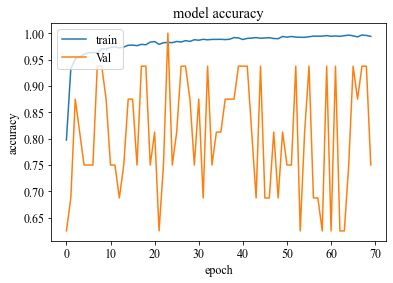

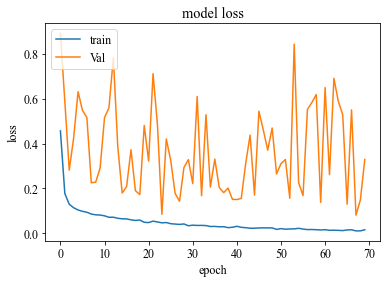

In [41]:
print(Third_Model_CNN_Fit.history.keys())
plt.plot(Third_Model_CNN_Fit.history['accuracy'])
plt.plot(Third_Model_CNN_Fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(Third_Model_CNN_Fit.history['loss'])
plt.plot(Third_Model_CNN_Fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

### Section F - Define Data Augmantation 

In [5]:
tf.keras.backend.clear_session()

In [6]:
#define image size and rescaling

IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [7]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(224, 
                                                              224,
                                                              1)),
    layers.experimental.preprocessing.RandomRotation(0.2), #make our dataset bigger by choosing different random rotation
    layers.experimental.preprocessing.RandomZoom(0.2), # same with random zooms
  ]
)

In [10]:
epochs = 70

Third_Model_CNN_Aug = Sequential([
  data_augmentation, # define the layers with augmentation
  layers.Conv2D(64, 3, padding='same', activation='relu'), 
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(1, activation='sigmoid'),

])


In [13]:
Third_Model_CNN_Aug.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=1e-4), metrics=['accuracy'])

Third_Model_CNN_Aug_Fit = Third_Model_CNN_Aug.fit(Train_Data,validation_data = Val_Data, epochs = epochs ,batch_size = BATCH_SIZE)

Epoch 1/70
326/326 [==============================] - 141s 429ms/step - loss: 0.5765 - accuracy: 0.7423 - val_loss: 0.8649 - val_accuracy: 0.5000
Epoch 2/70
326/326 [==============================] - 142s 434ms/step - loss: 0.4517 - accuracy: 0.7926 - val_loss: 0.5814 - val_accuracy: 0.7500
Epoch 3/70
326/326 [==============================] - 142s 436ms/step - loss: 0.3460 - accuracy: 0.8499 - val_loss: 0.5592 - val_accuracy: 0.8750
Epoch 4/70
326/326 [==============================] - 142s 437ms/step - loss: 0.3120 - accuracy: 0.8645 - val_loss: 0.7063 - val_accuracy: 0.6875
Epoch 5/70
326/326 [==============================] - 143s 437ms/step - loss: 0.2917 - accuracy: 0.8794 - val_loss: 0.7174 - val_accuracy: 0.6875
Epoch 6/70
326/326 [==============================] - 143s 437ms/step - loss: 0.2831 - accuracy: 0.8767 - val_loss: 0.8100 - val_accuracy: 0.6250
Epoch 7/70
326/326 [==============================] - 143s 437ms/step - loss: 0.2652 - accuracy: 0.8909 - val_loss: 0.6229 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


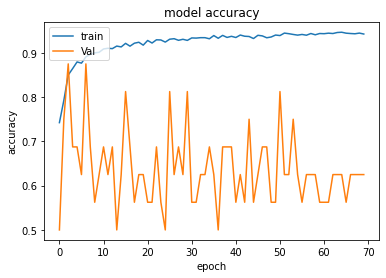

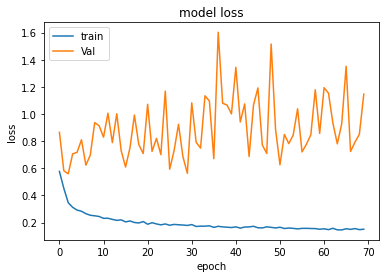

In [14]:
print(Third_Model_CNN_Aug_Fit.history.keys())
plt.plot(Third_Model_CNN_Aug_Fit.history['accuracy'])
plt.plot(Third_Model_CNN_Aug_Fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()


# summarize history for loss

plt.plot(Third_Model_CNN_Aug_Fit.history['loss'])
plt.plot(Third_Model_CNN_Aug_Fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()